In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
import torch.nn.functional as F
import torch.nn as nn
from torchvision.transforms import ToTensor
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"device: {device}")

device: cuda


In [3]:
class XAI(torch.nn.Module):
    def __init__(self, num_classes=2):
        super(XAI, self).__init__()
        self.features = nn.Sequential(nn.Conv2d(3, 64, kernel_size=3, bias=False),
                                      nn.BatchNorm2d(64),
                                      nn.ReLU(inplace=True), 
                                      nn.Dropout(0.3), 
                                      nn.Conv2d(64, 64, kernel_size=3, padding=1, bias=False), 
                                      nn.BatchNorm2d(64), 
                                      nn.ReLU(inplace=True), 
                                      nn.MaxPool2d(kernel_size=2, stride=2),

                                      nn.Conv2d(64, 128, kernel_size=3, padding=1, bias=False),
                                      nn.BatchNorm2d(128),
                                      nn.ReLU(inplace=True),
                                      nn.Dropout(0.4),
                                      nn.Conv2d(128, 128, kernel_size=3, padding=1, bias=False),
                                      nn.BatchNorm2d(128),
                                      nn.ReLU(inplace=True),
                                      nn.MaxPool2d(kernel_size=2, stride=2),

                                      nn.Conv2d(128, 256, kernel_size=3, padding=1, bias=False),
                                      nn.BatchNorm2d(256),
                                      nn.ReLU(inplace=True),
                                      nn.Dropout(0.4),
                                      nn.Conv2d(256, 256, kernel_size=3, padding=1, bias=False),
                                      nn.BatchNorm2d(256),
                                      nn.ReLU(inplace=True),
                                      nn.Dropout(0.4),
                                      nn.Conv2d(256, 256, kernel_size=3, padding=1, bias=False),
                                      nn.BatchNorm2d(256),
                                      nn.ReLU(inplace=True),
                                      nn.MaxPool2d(kernel_size=2, stride=2),

                                      nn.Conv2d(256, 512, kernel_size=3, padding=1, bias=False),
                                      nn.BatchNorm2d(512),
                                      nn.ReLU(inplace=True),
                                      nn.Dropout(0.4),
                                      nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
                                      nn.BatchNorm2d(512),
                                      nn.ReLU(inplace=True),
                                      nn.Dropout(0.4),
                                      nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
                                      nn.BatchNorm2d(512),
                                      nn.ReLU(inplace=True),
                                      nn.MaxPool2d(kernel_size=2, stride=2),

                                      nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
                                      nn.BatchNorm2d(512),
                                      nn.ReLU(inplace=True),
                                      nn.Dropout(0.4),
                                      nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
                                      nn.BatchNorm2d(512),
                                      nn.ReLU(inplace=True),
                                      nn.Dropout(0.4),
                                      nn.Conv2d(512, 512, kernel_size=3, padding=1, bias=False),
                                      nn.BatchNorm2d(512),
                                      nn.ReLU(inplace=True),
                                      nn.MaxPool2d(kernel_size=2, stride=2))

        self.classifier = nn.Sequential(nn.Linear(512, 512, bias=False), 
                                        nn.Dropout(0.5), 
                                        nn.BatchNorm1d(512), 
                                        nn.ReLU(inplace=True), 
                                        nn.Dropout(0.5), 
                                        nn.Linear(512, num_classes))

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 512)
        x = self.classifier(x)
        return F.log_softmax(x)

In [4]:
model = XAI()
model.cpu()
# model.to(device)
# DONE model.eval()
# Sets the module in evaluation mode.
# This is equivalent with self.train(False).
# https://pytorch.org/docs/stable/generated/torch.nn.Module.html
model.eval()

XAI(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True

In [5]:
class LayerActivations:
    features=[]
    def __init__(self, model, layer_num):
        # TODO self.hook ???
        self.hook = model[layer_num].register_forward_hook(self.hook_fn)
   
    def hook_fn(self, module, input, output):
        output = output
        #self.features = output.to(device).detach().numpy()
        self.features = output.detach().numpy()
    def remove(self): 
        self.hook.remove()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab\ Notebooks/Torch/chap05/data

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Torch/chap05/data


torch.Size([1, 3, 100, 100])


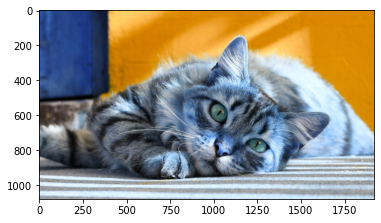

In [7]:
img = cv2.imread("cat.jpg")   
plt.imshow(img)
img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR)
img = ToTensor()(img).unsqueeze(0)

print(img.shape)

In [18]:
result = LayerActivations(model.features, 0)
model(img)
activations = result.features
print(activations.shape)

(1, 64, 98, 98)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


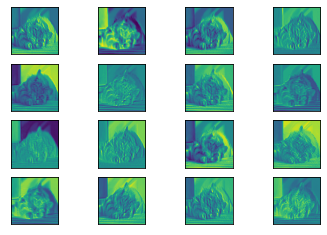

<Figure size 864x576 with 0 Axes>

In [20]:
fig, axes = plt.subplots(4,4)
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()

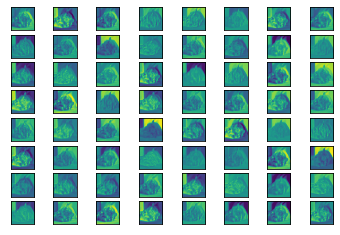

In [28]:
# TODO Keras 예제 처럼 실행 가능한지 확인해보기
fig, axes = plt.subplots(8, 8)
cnt = 0
for row in range(8):
    for column in range(8):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][cnt])
        cnt += 1
plt.show()

In [10]:
result = LayerActivations(model.features, 20)

model(img)
activations = result.features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


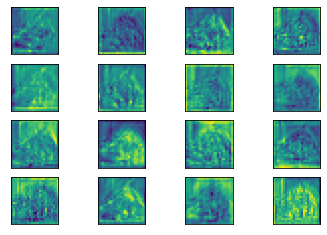

<Figure size 864x576 with 0 Axes>

In [11]:
fig, axes = plt.subplots(4,4)
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()

In [12]:
result = LayerActivations(model.features, 40)

model(img)
activations = result.features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


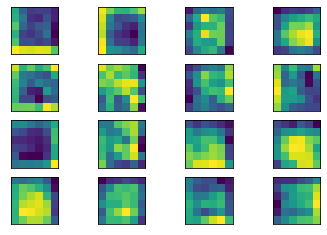

<Figure size 864x576 with 0 Axes>

In [13]:
fig, axes = plt.subplots(4,4)
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for row in range(4):
    for column in range(4):
        axis = axes[row][column]
        axis.get_xaxis().set_ticks([])
        axis.get_yaxis().set_ticks([])
        axis.imshow(activations[0][row*10+column])
plt.show()